# Data overview

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
hf = pd.read_csv("heart_failure.csv")

In [271]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [272]:
hf.shape

(299, 13)

In [273]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [274]:
hf.drop(columns = ["time"], inplace = True)

In [275]:
hf.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


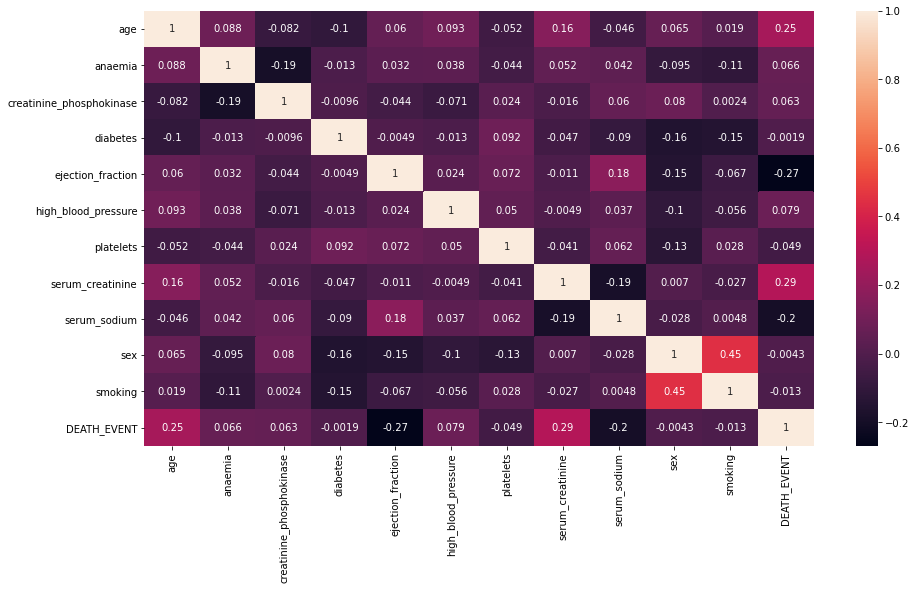

In [276]:
plt.subplots(figsize = (15,8))

sns.heatmap(hf.corr(), annot = True)
plt.show()

# Scaling

In [277]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

hf_sc = scaler.fit_transform(hf)

In [278]:
hf_sc

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        1.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.        ],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        0.        ]])

# Kmeans

In [279]:
from sklearn.cluster import KMeans

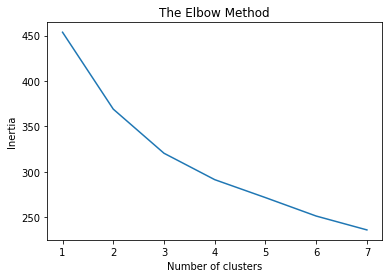

In [280]:
inertia = []

for i in range(1,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(hf_sc)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,8), inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [281]:
kmeans = KMeans(n_clusters = 4)
hf_cluster = kmeans.fit(hf_sc)

In [282]:
hf_cluster

KMeans(n_clusters=4)

In [283]:
hf_cluster.cluster_centers_


array([[ 3.28951049e-01,  3.38461538e-01,  7.70133668e-02,
         2.76923077e-01,  3.79953380e-01,  2.30769231e-01,
         2.87923127e-01,  7.69230769e-02,  6.92747253e-01,
         1.00000000e+00,  1.00000000e+00,  1.11022302e-16],
       [ 3.92424242e-01,  4.52380952e-01,  5.39025383e-02,
        -4.44089210e-16,  4.08549784e-01,  4.40476190e-01,
         2.80704504e-01,  9.16666667e-02,  6.99659864e-01,
         4.16666667e-01,  1.19047619e-02,  1.54761905e-01],
       [ 4.90235786e-01,  4.28571429e-01,  9.30691746e-02,
         3.17460317e-01,  2.60942761e-01,  3.65079365e-01,
         2.85341911e-01,  1.43178170e-01,  6.39002268e-01,
         9.84126984e-01,  4.44444444e-01,  1.00000000e+00],
       [ 3.22187461e-01,  4.82758621e-01,  6.80607004e-02,
         1.00000000e+00,  3.86799025e-01,  3.44827586e-01,
         2.99887721e-01,  9.55185329e-02,  6.64039409e-01,
         3.67816092e-01,  2.29885057e-02,  2.29885057e-01]])

In [284]:
hf["Cluster"] = hf_cluster.fit_predict(hf_sc)

In [285]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Cluster
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1,3


In [286]:
hf.Cluster.value_counts()

3    94
0    84
1    63
2    58
Name: Cluster, dtype: int64

In [287]:
hf_cluster.inertia_

294.8328873654505

In [288]:
cl_1 = hf.loc[hf.Cluster == 0]
cl1_d= cl_1.describe()
cl1_d

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Cluster
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0,84.0,84.000000,84.0
mean,60.047619,0.285714,638.857143,0.333333,37.428571,0.261905,262347.884167,1.225714,136.690476,1.0,1.0,0.226190,0.0
std,11.082282,0.454467,1071.315812,0.474236,11.152055,0.442312,105518.195327,0.572884,4.528294,0.0,0.0,0.420877,0.0
min,40.000000,0.000000,56.000000,0.000000,17.000000,0.000000,51000.000000,0.600000,113.000000,1.0,1.0,0.000000,0.0
25%,52.000000,0.000000,129.000000,0.000000,30.000000,0.000000,198500.000000,0.900000,135.000000,1.0,1.0,0.000000,0.0
50%,60.000000,0.000000,231.000000,0.000000,35.000000,0.000000,262679.015000,1.100000,137.000000,1.0,1.0,0.000000,0.0
75%,69.000000,1.000000,582.000000,1.000000,45.000000,1.000000,304250.000000,1.300000,139.000000,1.0,1.0,0.000000,0.0
max,85.000000,1.000000,5882.000000,1.000000,62.000000,1.000000,850000.000000,3.800000,145.000000,1.0,1.0,1.000000,0.0


In [289]:
cl_2 = hf.loc[hf.Cluster == 1]
cl2_d= cl_2.describe()
cl2_d


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Cluster
count,63.000000,63.000000,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0
mean,61.000000,0.269841,454.111111,0.0,41.285714,0.396825,258135.019206,1.256032,137.412698,0.317460,0.015873,0.111111,1.0
std,12.034895,0.447443,528.062011,0.0,11.429205,0.493169,79079.870904,0.691435,3.621775,0.469227,0.125988,0.316794,0.0
min,40.000000,0.000000,47.000000,0.0,25.000000,0.000000,62000.000000,0.500000,127.000000,0.000000,0.000000,0.000000,1.0
25%,50.000000,0.000000,99.000000,0.0,35.000000,0.000000,218000.000000,0.900000,135.000000,0.000000,0.000000,0.000000,1.0
50%,61.000000,0.000000,253.000000,0.0,40.000000,0.000000,263000.000000,1.100000,137.000000,0.000000,0.000000,0.000000,1.0
75%,70.000000,1.000000,582.000000,0.0,47.500000,1.000000,284500.000000,1.300000,140.000000,1.000000,0.000000,0.000000,1.0
max,90.000000,1.000000,2522.000000,0.0,80.000000,1.000000,507000.000000,5.000000,148.000000,1.000000,1.000000,1.000000,1.0


In [290]:
cl_3 = hf.loc[hf.Cluster == 2]
cl3_d= cl_3.describe()
cl3_d

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Cluster
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,66.183914,0.793103,546.620690,0.051724,34.137931,0.431034,254628.14000,1.802759,136.275862,0.879310,0.155172,0.741379,2.0
std,13.823752,0.408619,1105.682782,0.223404,12.326620,0.499546,100724.25503,1.702791,3.847045,0.328611,0.365231,0.441701,0.0
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,47000.00000,0.700000,127.000000,0.000000,0.000000,0.000000,2.0
25%,55.000000,1.000000,111.250000,0.000000,25.000000,0.000000,196500.00000,1.000000,134.000000,1.000000,0.000000,0.250000,2.0
50%,65.500000,1.000000,194.000000,0.000000,35.000000,0.000000,239500.00000,1.200000,137.000000,1.000000,0.000000,1.000000,2.0
75%,75.000000,1.000000,582.000000,0.000000,40.000000,1.000000,296000.00000,1.822500,139.000000,1.000000,0.000000,1.000000,2.0
max,95.000000,1.000000,7861.000000,1.000000,70.000000,1.000000,621000.00000,9.400000,145.000000,1.000000,1.000000,1.000000,2.0


In [291]:
cl_4 = hf.loc[hf.Cluster == 3]
cl4_d= cl_4.describe()
cl4_d

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Cluster
count,94.000000,94.000000,94.000000,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0
mean,58.124117,0.446809,638.223404,1.0,38.957447,0.351064,273147.767553,1.384255,136.255319,0.414894,0.021277,0.287234,3.0
std,10.208928,0.499828,1019.431026,0.0,11.822991,0.479862,100813.635973,0.947505,5.062908,0.495346,0.145079,0.454898,0.0
min,40.000000,0.000000,30.000000,1.0,15.000000,0.000000,25100.000000,0.700000,116.000000,0.000000,0.000000,0.000000,3.0
25%,50.000000,0.000000,124.750000,1.0,30.000000,0.000000,222250.000000,0.925000,134.000000,0.000000,0.000000,0.000000,3.0
50%,60.000000,0.000000,280.500000,1.0,38.000000,0.000000,263358.030000,1.050000,136.000000,0.000000,0.000000,0.000000,3.0
75%,65.000000,1.000000,582.000000,1.0,43.750000,1.000000,314750.000000,1.400000,140.000000,1.000000,0.000000,1.000000,3.0
max,94.000000,1.000000,7702.000000,1.0,62.000000,1.000000,742000.000000,6.800000,146.000000,1.000000,1.000000,1.000000,3.0


In [292]:
cl1_d.iloc[1]

age                             60.047619
anaemia                          0.285714
creatinine_phosphokinase       638.857143
diabetes                         0.333333
ejection_fraction               37.428571
high_blood_pressure              0.261905
platelets                   262347.884167
serum_creatinine                 1.225714
serum_sodium                   136.690476
sex                              1.000000
smoking                          1.000000
DEATH_EVENT                      0.226190
Cluster                          0.000000
Name: mean, dtype: float64

In [293]:
cl2_d.iloc[1]

age                             61.000000
anaemia                          0.269841
creatinine_phosphokinase       454.111111
diabetes                         0.000000
ejection_fraction               41.285714
high_blood_pressure              0.396825
platelets                   258135.019206
serum_creatinine                 1.256032
serum_sodium                   137.412698
sex                              0.317460
smoking                          0.015873
DEATH_EVENT                      0.111111
Cluster                          1.000000
Name: mean, dtype: float64

In [294]:
cl3_d.iloc[1]

age                             66.183914
anaemia                          0.793103
creatinine_phosphokinase       546.620690
diabetes                         0.051724
ejection_fraction               34.137931
high_blood_pressure              0.431034
platelets                   254628.140000
serum_creatinine                 1.802759
serum_sodium                   136.275862
sex                              0.879310
smoking                          0.155172
DEATH_EVENT                      0.741379
Cluster                          2.000000
Name: mean, dtype: float64

In [295]:
cl4_d.iloc[1]

age                             58.124117
anaemia                          0.446809
creatinine_phosphokinase       638.223404
diabetes                         1.000000
ejection_fraction               38.957447
high_blood_pressure              0.351064
platelets                   273147.767553
serum_creatinine                 1.384255
serum_sodium                   136.255319
sex                              0.414894
smoking                          0.021277
DEATH_EVENT                      0.287234
Cluster                          3.000000
Name: mean, dtype: float64

In [296]:
frame = { "CL-1": cl1_d.iloc[1], "CL-2": cl2_d.iloc[1], "CL-3": cl3_d.iloc[1], "CL-4": cl4_d.iloc[1] } 

In [174]:
df_cl = pd.DataFrame(frame) 

In [175]:
df_cl

,CL-1,CL-2,CL-3,CL-4
age,66.123196,59.961754,59.587156,60.180723
anaemia,1.000000,1.000000,0.000000,0.265060
creatinine_phosphokinase,319.456522,411.901639,742.055046,641.746988
diabetes,0.391304,0.475410,0.477064,0.313253
ejection_fraction,34.347826,40.852459,38.495413,37.578313
high_blood_pressure,0.413043,0.377049,0.366972,0.277108
platelets,259956.521739,254530.459508,271380.462844,261195.449036
serum_creatinine,1.939783,1.218033,1.390642,1.224819
serum_sodium,135.565217,137.475410,136.458716,136.807229
sex,0.565217,0.475410,0.522936,0.987952


In [181]:
df_cl = df_cl.drop(["Cluster"])

In [182]:
df_cl

,CL-1,CL-2,CL-3,CL-4
age,66.123196,59.961754,59.587156,60.180723
anaemia,1.000000,1.000000,0.000000,0.265060
creatinine_phosphokinase,319.456522,411.901639,742.055046,641.746988
diabetes,0.391304,0.475410,0.477064,0.313253
ejection_fraction,34.347826,40.852459,38.495413,37.578313
high_blood_pressure,0.413043,0.377049,0.366972,0.277108
platelets,259956.521739,254530.459508,271380.462844,261195.449036
serum_creatinine,1.939783,1.218033,1.390642,1.224819
serum_sodium,135.565217,137.475410,136.458716,136.807229
sex,0.565217,0.475410,0.522936,0.987952


In [183]:
from sklearn import preprocessing

x = df_cl.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cl_scaled = pd.DataFrame(x_scaled)

In [184]:
df_cl_scaled

,0,1,2,3
0,2.533593e-04,0.000236,2.195705e-04,2.296210e-04
1,2.843288e-06,0.000004,0.000000e+00,2.306358e-07
2,1.227882e-03,0.001618,2.734372e-03,2.456179e-03
3,5.017567e-07,0.000002,1.757917e-06,4.151444e-07
4,1.311257e-04,0.000161,1.418503e-04,1.430864e-04
5,5.853828e-07,0.000001,1.352244e-06,2.767629e-07
6,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
7,6.458444e-06,0.000005,5.124327e-06,3.905125e-06
8,5.204889e-04,0.000540,5.028318e-04,5.229897e-04
9,1.170766e-06,0.000002,1.926947e-06,2.998265e-06


In [209]:
df = df_cl_scaled.rename(columns = {0: "CL-1", 1: "CL-2", 2: "CL-3", 3: "CL-4"})

In [210]:
df

,CL-1,CL-2,CL-3,CL-4
0,2.533593e-04,0.000236,2.195705e-04,2.296210e-04
1,2.843288e-06,0.000004,0.000000e+00,2.306358e-07
2,1.227882e-03,0.001618,2.734372e-03,2.456179e-03
3,5.017567e-07,0.000002,1.757917e-06,4.151444e-07
4,1.311257e-04,0.000161,1.418503e-04,1.430864e-04
5,5.853828e-07,0.000001,1.352244e-06,2.767629e-07
6,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
7,6.458444e-06,0.000005,5.124327e-06,3.905125e-06
8,5.204889e-04,0.000540,5.028318e-04,5.229897e-04
9,1.170766e-06,0.000002,1.926947e-06,2.998265e-06


In [211]:
df_cl.index

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [212]:
df["names"] = df_cl.index

In [213]:
df

,CL-1,CL-2,CL-3,CL-4,names
0,2.533593e-04,0.000236,2.195705e-04,2.296210e-04,age
1,2.843288e-06,0.000004,0.000000e+00,2.306358e-07,anaemia
2,1.227882e-03,0.001618,2.734372e-03,2.456179e-03,creatinine_phosphokinase
3,5.017567e-07,0.000002,1.757917e-06,4.151444e-07,diabetes
4,1.311257e-04,0.000161,1.418503e-04,1.430864e-04,ejection_fraction
5,5.853828e-07,0.000001,1.352244e-06,2.767629e-07,high_blood_pressure
6,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,platelets
7,6.458444e-06,0.000005,5.124327e-06,3.905125e-06,serum_creatinine
8,5.204889e-04,0.000540,5.028318e-04,5.229897e-04,serum_sodium
9,1.170766e-06,0.000002,1.926947e-06,2.998265e-06,sex


In [216]:
df_cl

,CL-1,CL-2,CL-3,CL-4
age,66.123196,59.961754,59.587156,60.180723
anaemia,1.000000,1.000000,0.000000,0.265060
creatinine_phosphokinase,319.456522,411.901639,742.055046,641.746988
diabetes,0.391304,0.475410,0.477064,0.313253
ejection_fraction,34.347826,40.852459,38.495413,37.578313
high_blood_pressure,0.413043,0.377049,0.366972,0.277108
platelets,259956.521739,254530.459508,271380.462844,261195.449036
serum_creatinine,1.939783,1.218033,1.390642,1.224819
serum_sodium,135.565217,137.475410,136.458716,136.807229
sex,0.565217,0.475410,0.522936,0.987952


In [217]:
df_cl_t = df_cl.T

In [218]:
df_cl_t

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
CL-1,66.123196,1.00000,319.456522,0.391304,34.347826,0.413043,259956.521739,1.939783,135.565217,0.565217,0.260870,1.000000
CL-2,59.961754,1.00000,411.901639,0.475410,40.852459,0.377049,254530.459508,1.218033,137.475410,0.475410,0.000000,0.000000
CL-3,59.587156,0.00000,742.055046,0.477064,38.495413,0.366972,271380.462844,1.390642,136.458716,0.522936,0.009174,0.302752
CL-4,60.180723,0.26506,641.746988,0.313253,37.578313,0.277108,261195.449036,1.224819,136.807229,0.987952,1.000000,0.204819


In [219]:
from sklearn import preprocessing

x = df_cl_t.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cl_scaled1 = pd.DataFrame(x_scaled)

In [220]:
df_cl_scaled1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,1.00000,0.000000,0.476471,0.000000,1.000000,0.322021,1.000000,0.000000,0.175220,0.260870,1.000000
1,0.057313,1.00000,0.218754,0.989901,1.000000,0.735210,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,1.000000,1.000000,0.637636,0.661081,1.000000,0.239154,0.467753,0.092726,0.009174,0.302752
3,0.090814,0.26506,0.762640,0.000000,0.496644,0.000000,0.395548,0.009403,0.650202,1.000000,1.000000,0.204819


In [221]:
df_t = df_cl_scaled1.T

In [222]:
df_t

,0,1,2,3
0,1.000000,0.057313,0.000000,0.090814
1,1.000000,1.000000,0.000000,0.265060
2,0.000000,0.218754,1.000000,0.762640
3,0.476471,0.989901,1.000000,0.000000
4,0.000000,1.000000,0.637636,0.496644
5,1.000000,0.735210,0.661081,0.000000
6,0.322021,0.000000,1.000000,0.395548
7,1.000000,0.000000,0.239154,0.009403
8,0.000000,1.000000,0.467753,0.650202
9,0.175220,0.000000,0.092726,1.000000


In [223]:
df_t["names"] = df_cl.index

In [224]:
df_t

,0,1,2,3,names
0,1.000000,0.057313,0.000000,0.090814,age
1,1.000000,1.000000,0.000000,0.265060,anaemia
2,0.000000,0.218754,1.000000,0.762640,creatinine_phosphokinase
3,0.476471,0.989901,1.000000,0.000000,diabetes
4,0.000000,1.000000,0.637636,0.496644,ejection_fraction
5,1.000000,0.735210,0.661081,0.000000,high_blood_pressure
6,0.322021,0.000000,1.000000,0.395548,platelets
7,1.000000,0.000000,0.239154,0.009403,serum_creatinine
8,0.000000,1.000000,0.467753,0.650202,serum_sodium
9,0.175220,0.000000,0.092726,1.000000,sex


In [225]:
df_t = df_t.rename(columns = {0: "CL-1", 1: "CL-2", 2: "CL-3", 3: "CL-4"})

In [226]:
df_t

,CL-1,CL-2,CL-3,CL-4,names
0,1.000000,0.057313,0.000000,0.090814,age
1,1.000000,1.000000,0.000000,0.265060,anaemia
2,0.000000,0.218754,1.000000,0.762640,creatinine_phosphokinase
3,0.476471,0.989901,1.000000,0.000000,diabetes
4,0.000000,1.000000,0.637636,0.496644,ejection_fraction
5,1.000000,0.735210,0.661081,0.000000,high_blood_pressure
6,0.322021,0.000000,1.000000,0.395548,platelets
7,1.000000,0.000000,0.239154,0.009403,serum_creatinine
8,0.000000,1.000000,0.467753,0.650202,serum_sodium
9,0.175220,0.000000,0.092726,1.000000,sex


# Cluster assessment

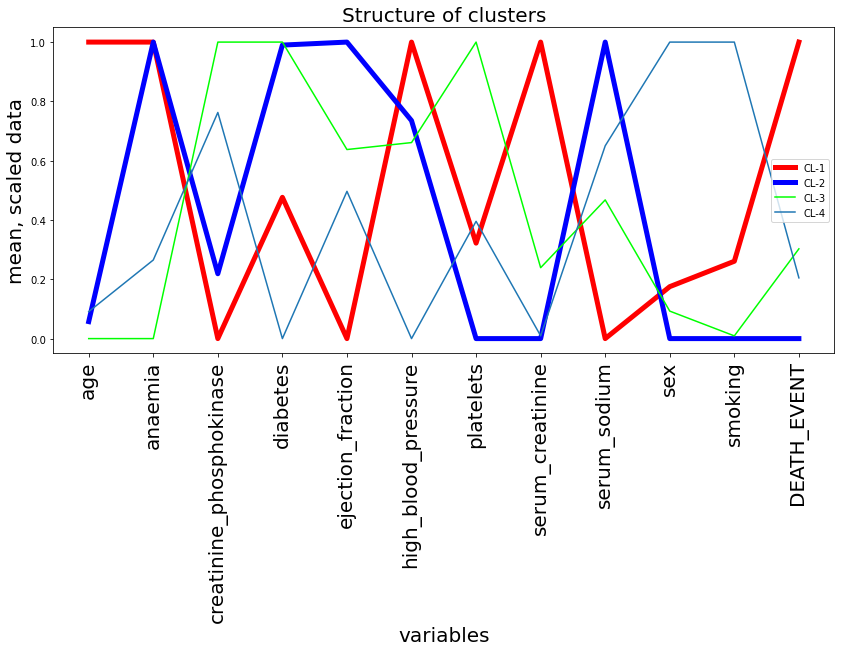

In [262]:
plt.figure(figsize =(14,6))
sns.lineplot(data=df_t, x="names", y="CL-1", linewidth=5, color = "red", legend='brief', label=str("CL-1"))
sns.lineplot(data=df_t, x="names", y="CL-2", linewidth=5, color = "blue", legend='brief', label=str("CL-2"))
sns.lineplot(data=df_t, x="names", y="CL-3", color = "lime", legend='brief', label=str("CL-3"))
sns.lineplot(data=df_t, x="names", y="CL-4", legend='brief', label=str("CL-4"))


plt.xticks(fontsize=20, rotation=90)
plt.xlabel("variables", fontsize=20)
plt.ylabel("mean, scaled data", fontsize=20)
plt.title("Structure of clusters", fontsize = 20)

plt.show()

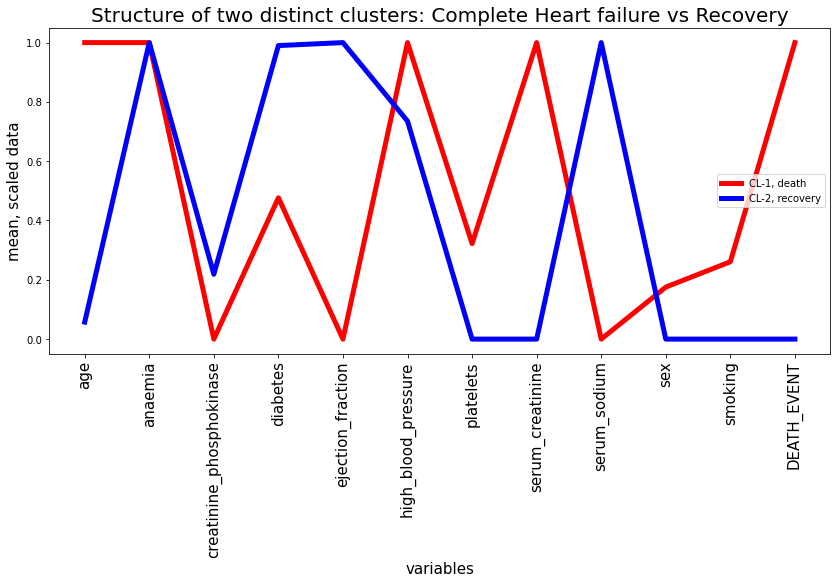

In [341]:
plt.figure(figsize =(14,6))
sns.lineplot(data=df_t, x="names", y="CL-1", linewidth=5, color = "red", legend='brief', label=str("CL-1, death"))
sns.lineplot(data=df_t, x="names", y="CL-2", linewidth=5, color = "blue", legend='brief', label=str("CL-2, recovery"))


plt.legend(loc='center right')
plt.xticks(fontsize=15, rotation=90)
plt.xlabel("variables", fontsize=15)
plt.ylabel("mean, scaled data", fontsize=15)
plt.title("Structure of two distinct clusters: Complete Heart failure vs Recovery", fontsize = 20)
plt.show()

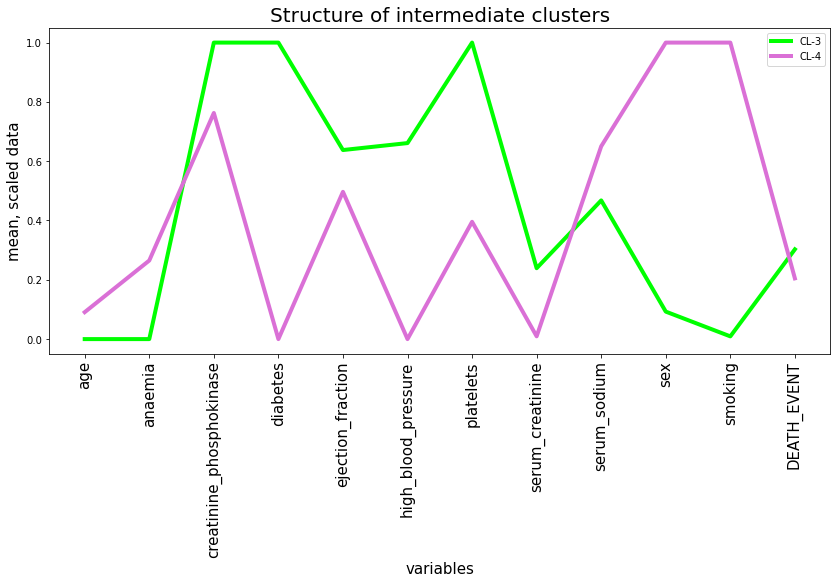

In [340]:
plt.figure(figsize =(14,6))

sns.lineplot(data=df_t, x="names", y="CL-3", color = "lime", linewidth=4, legend='brief', label=str("CL-3"))
sns.lineplot(data=df_t, x="names", y="CL-4", color = "orchid", linewidth=4, legend='brief', label=str("CL-4"))


plt.xticks(fontsize=15, rotation=90)
plt.xlabel("variables", fontsize=15)
plt.ylabel("mean, scaled data", fontsize=15)
plt.title("Structure of intermediate clusters", fontsize = 20)

plt.show()

# PCA

In [297]:
from sklearn.decomposition import PCA

In [298]:
pca = PCA(n_components = 2)

In [299]:
res = pca.fit_transform(hf_sc)

In [316]:
hf_sc

array([[0.63636364, 0.        , 0.07131921, ..., 1.        , 0.        ,
        1.        ],
       [0.27272727, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.45454545, 0.        , 0.01569278, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.09090909, 0.        , 0.25988773, ..., 0.        , 0.        ,
        0.        ],
       [0.09090909, 0.        , 0.30492473, ..., 1.        , 1.        ,
        0.        ],
       [0.18181818, 0.        , 0.02207196, ..., 1.        , 1.        ,
        0.        ]])

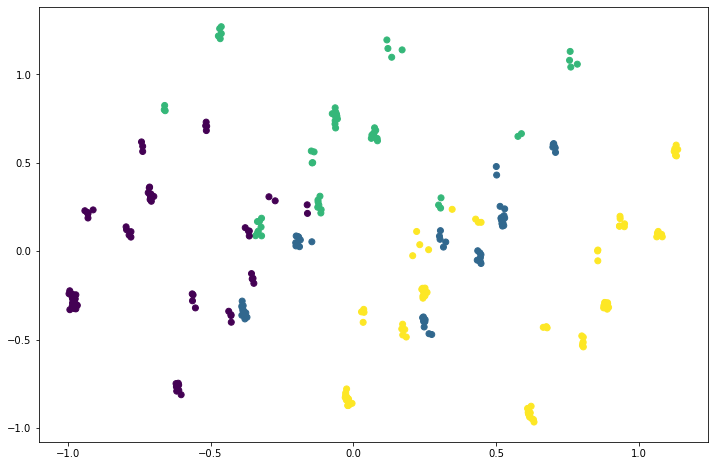

In [300]:
plt.figure(figsize=(12,8))
plt.scatter(x = res[:,0], y = res[:,1], c = kmeans.labels_, cmap = "viridis")
plt.show()

array([[-1.47232842e-01,  5.66267411e-01],
       [-3.42193860e-01,  8.72852424e-02],
       [-9.29953500e-01,  2.14362482e-01],
       [-6.43412432e-02,  7.18683201e-01],
       [ 9.33269499e-01,  1.97286310e-01],
       [-4.68011188e-01,  1.25800746e+00],
       [-7.39051726e-02,  7.77158056e-01],
       [-2.73658323e-01,  2.84623841e-01],
       [ 3.23336155e-01,  5.17957334e-02],
       [-4.62391581e-01,  1.26888756e+00],
       [-4.62345808e-01,  1.22997103e+00],
       [-7.37468249e-01,  5.92705131e-01],
       [-6.22148786e-02,  6.96372120e-01],
       [ 1.34158621e-01,  1.09617694e+00],
       [ 7.07548709e-01,  5.58176991e-01],
       [-5.91327160e-02,  7.75285910e-01],
       [-6.20361144e-02,  7.86903833e-01],
       [-3.35216755e-01,  1.04457350e-01],
       [ 7.56616225e-01,  1.07893778e+00],
       [ 9.48338858e-01,  1.38187604e-01],
       [ 6.99369911e-01,  6.03155845e-01],
       [ 1.12507779e+00,  5.78784578e-01],
       [-4.66071331e-01,  1.20104050e+00],
       [-4.

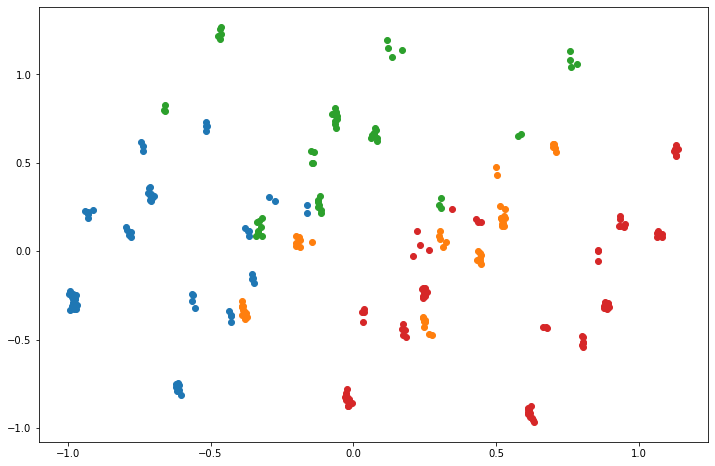

In [322]:
plt.figure(figsize=(12,8))
plt.scatter(x = res[hf.Cluster==0 ,0], y = res[hf.Cluster==0, 1], cmap = "viridis")
plt.scatter(x = res[hf.Cluster==1 ,0], y = res[hf.Cluster==1, 1], cmap = "viridis")
plt.scatter(x = res[hf.Cluster==2 ,0], y = res[hf.Cluster==2, 1], cmap = "viridis")
plt.scatter(x = res[hf.Cluster==3 ,0], y = res[hf.Cluster==3, 1], cmap = "viridis")


plt.show()

In [301]:
kmeans.labels_

array([2, 2, 0, 2, 3, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 3, 1, 3,
       2, 3, 3, 0, 2, 0, 2, 0, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 2, 0, 2, 2, 2, 2, 3, 3, 3, 2, 0, 0, 0, 0, 3, 1, 0, 2, 1, 0,
       3, 2, 1, 3, 0, 0, 0, 0, 0, 2, 1, 3, 0, 1, 1, 0, 3, 2, 3, 1, 1, 3,
       3, 2, 0, 3, 1, 2, 3, 2, 3, 1, 3, 3, 2, 1, 0, 0, 1, 2, 1, 3, 0, 0,
       0, 0, 3, 2, 3, 1, 3, 1, 3, 1, 0, 3, 3, 1, 2, 1, 3, 3, 0, 3, 0, 3,
       1, 0, 0, 1, 3, 2, 3, 1, 2, 1, 3, 1, 2, 0, 0, 1, 2, 1, 1, 3, 0, 0,
       1, 3, 1, 0, 2, 0, 2, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 3, 0, 3, 0, 0, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 0, 2, 2, 3, 1,
       3, 0, 2, 3, 1, 0, 0, 3, 1, 1, 3, 3, 0, 0, 0, 3, 2, 1, 1, 2, 3, 3,
       2, 0, 0, 1, 3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 1, 1, 3, 0, 3, 0,
       0, 1, 3, 3, 2, 1, 0, 3, 1, 3, 1, 3, 2, 0, 1, 3, 3, 0, 1, 1, 2, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 1, 1, 0, 1, 1, 3, 3, 3, 3, 0, 0, 0, 2, 3,
       1, 3, 3, 1, 3, 1, 0, 0, 0, 1, 3, 0, 0])

In [302]:
hf.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT',
       'Cluster'],
      dtype='object')

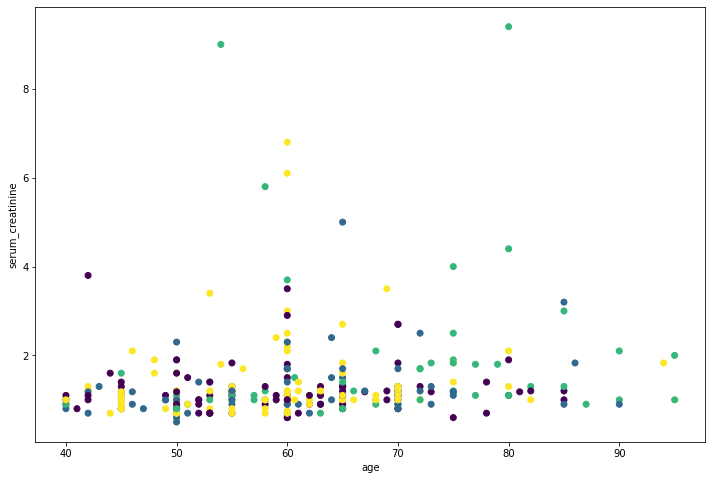

In [303]:
plt.figure(figsize=(12,8))
plt.scatter(x = hf["age"], y = hf["serum_creatinine"], c = kmeans.labels_, cmap = "viridis")
plt.xlabel("age")
plt.ylabel("serum_creatinine")
plt.show()

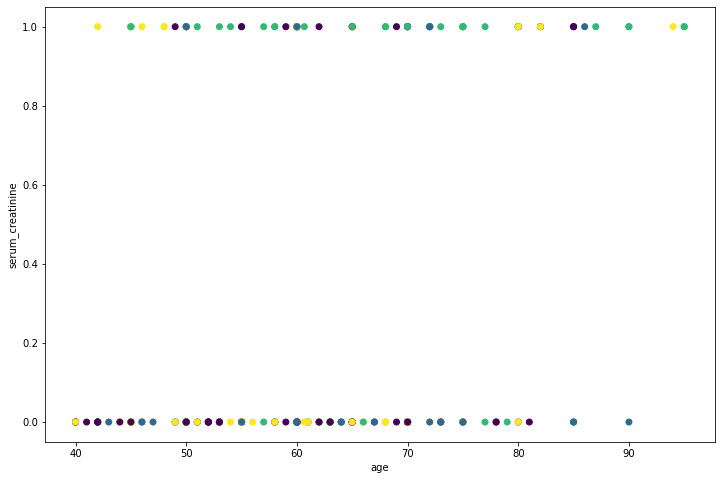

In [304]:
plt.figure(figsize=(12,8))
plt.scatter(x = hf["age"], y = hf["DEATH_EVENT"], c = kmeans.labels_, cmap = "viridis")
plt.xlabel("age")
plt.ylabel("serum_creatinine")
plt.show()

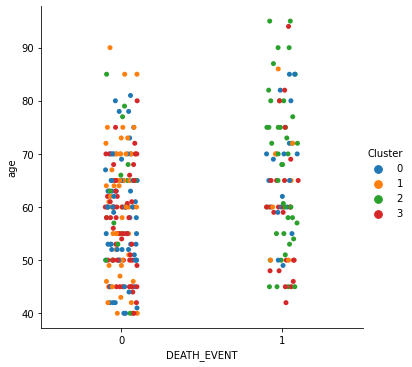

In [305]:
sns.catplot(x="DEATH_EVENT", y = "age", hue = "Cluster", data=hf)
plt.show()

# Dendrogram

In [344]:
from sklearn.cluster import AgglomerativeClustering 

In [348]:
import scipy.cluster.hierarchy as shc 

In [349]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(hf_sc) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

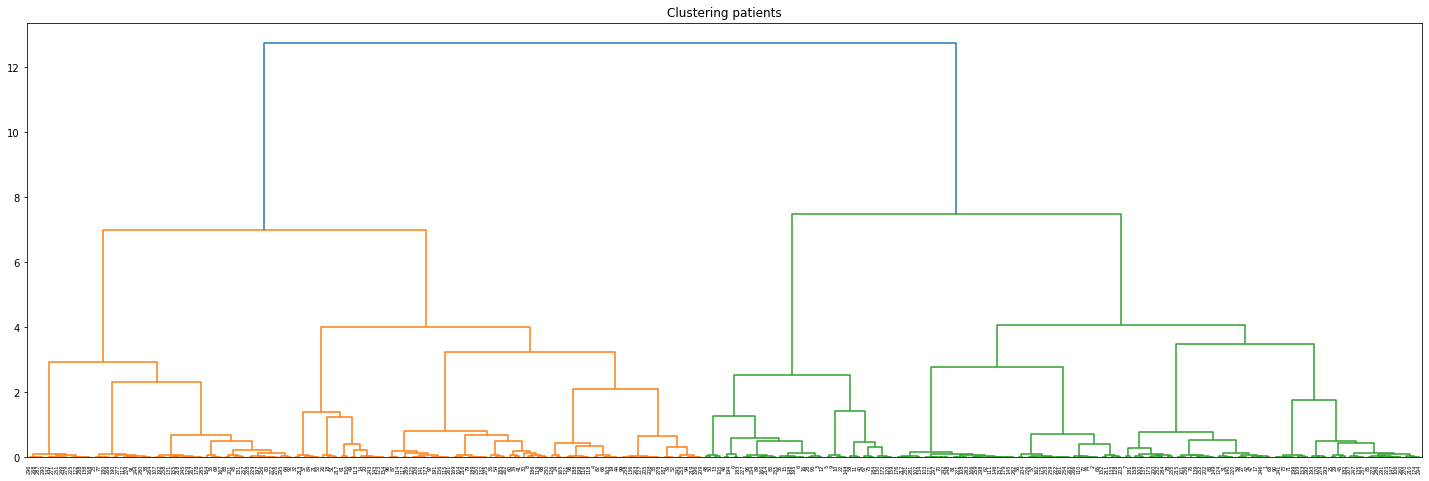

In [354]:
plt.figure(figsize =(25, 8)) 
plt.xticks(fontsize=15, rotation=90)

plt.title('Clustering patients') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [356]:
# 4 clusters are visible on the dendrogram